## 用keras实现卷积模型的API主要有：
* Sequential API
* Functional API

### 0. 输出环境信息

In [1]:
import platform
import tensorflow
import keras

print('Plateform: {}'.format(platform.platform()))
print('Tensorflow version: {}'.format(tensorflow.__version__))
print('Keras version: {}'.format(keras.__version__))

/home/yinyunjie/anaconda3/envs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Plateform: Linux-4.13.0-37-generic-x86_64-with-debian-stretch-sid
Tensorflow version: 1.7.0
Keras version: 2.1.5


Using TensorFlow backend.


## 1. 序贯模型（Sequential Models)

### 1.1 构建网络

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization, Conv2D, Dense 
from keras.layers import Dropout, Flatten, MaxPooling2D
from keras.utils import plot_model


# 初始化序贯模型对象
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))

# 模型结构
model.summary()

# 把模型结构保存为图片
plot_model(model, to_file='model.png')

### 1.2 编译

In [ ]:
from keras import optimizers

# 编译
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### 1.3 训练

#### 1.3.1 Data Generator

两类图片的组织结构：

train_dir
   |---cat
   |    |---0.jpg
   |    |---1.jpg
   |    |.
   |---dog
   |    |---0.jpg
   |    |---1.jpg
        |.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_dir = '.....'
validation_dir = '......'

# 直接从图片所在的目录中读取数据
train_generator = train_datagen.flow_from_directory(
    train_dir,  #图片所在目录
    target_size=(150, 150),  #图片被处理为（150, 150）
    batch_size=20,
    class_mode='binary' # 分类类型
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, # batch_size * steps_per_epoch = train number
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

## 2. Functional API

### 2.1 构建网络

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model

input = Input(shape=(784, ), name='input')

x = Dense(512, activation='relu', name='hidden1')(input)
x1 = Dense(216, activation='relu', name='hidden2')(x)
x2 = Dense(128, activation='relu', name='hidden3')(x1)
output = Dense(10, activation='softmax', name='output')(x2)

model = Model(inputs=input, outputs=output)

# 打印网络结构
model.summary()

# plot model
plot_model(model, to_file='model_structure.png')

### 2.2 共享输入层模型

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 26, 26, 32)   320         input[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 24, 24, 16)   416         input[0][0]                      
__________________________________________________________________________________________________
pool (MaxPooling2D)             (None, 13, 13, 32)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool2 (Max

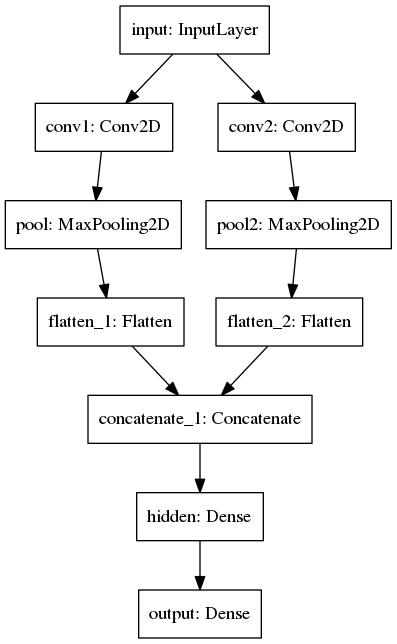

In [2]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model
from IPython.display import Image

# 输入层
mnist_input = Input(shape=(28, 28, 1), name='input')

# 第一个特征提取分支
conv1 = Conv2D(32, (3, 3), activation='relu', name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2, 2), name='pool')(conv1)
flat1 = Flatten()(pool1)

# 第二个特征提取分支
conv2 = Conv2D(16, (5, 5), activation='relu', name='conv2')(mnist_input)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)
flat2 = Flatten()(pool2)

# 合并两个分支
merge = concatenate([flat1, flat2])

# 全连接
hidden = Dense(64, activation='relu', name='hidden')(merge)

# 输出层
output = Dense(10, activation='softmax', name='output')(hidden)

# 网络
model = Model(inputs=mnist_input, outputs=output)

model.summary()

plot_model(model, to_file='model_structure.png')

Image('model_structure.png')

### 2.3 多输入模型

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_gray_bigsize (InputLayer)   (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
img_rgb_smallsize (InputLayer)  (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv11 (Conv2D)                 (None, 61, 61, 32)   544         img_gray_bigsize[0][0]           
__________________________________________________________________________________________________
conv21 (Conv2D)                 (None, 29, 29, 32)   1568        img_rgb_smallsize[0][0]          
__________________________________________________________________________________________________
pool11 (Ma

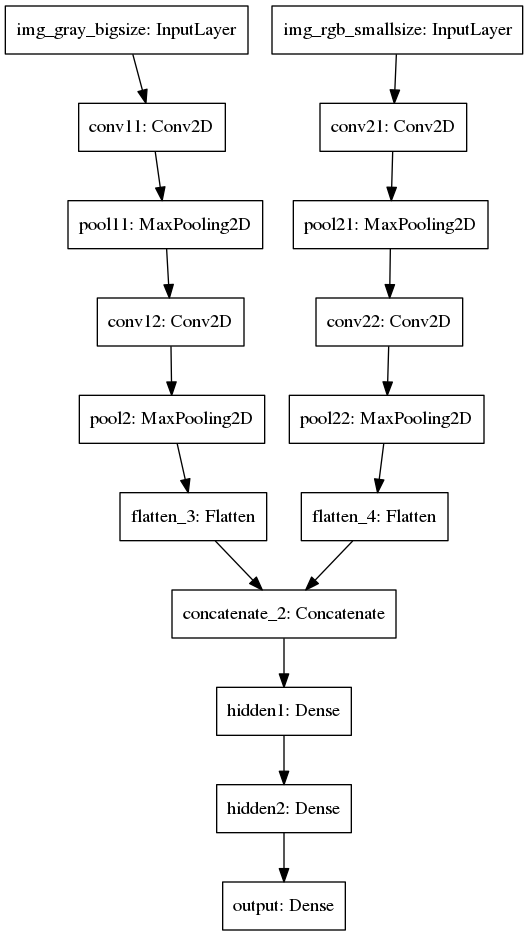

In [3]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import  MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

# 第一个输入层
img_gray_bigsize = Input(shape=(64, 64, 1), name='img_gray_bigsize')
conv11 = Conv2D(32, (4, 4), activation='relu', name='conv11')(img_gray_bigsize)
pool11 = MaxPool2D(pool_size=(2, 2), name='pool11')(conv11)
conv12 = Conv2D(16, (2, 2), activation='relu', name='conv12')(pool11)
pool12 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv12)
flat1 = Flatten()(pool12)

# 第二个输入层
img_rgb_smallsize = Input(shape=(32, 32, 3), name='img_rgb_smallsize')

conv21 = Conv2D(32, (4, 4), activation='relu', name='conv21')(img_rgb_smallsize)
pool21 = MaxPool2D(pool_size=(2, 2), name='pool21')(conv21)
conv22 = Conv2D(16, (4, 4), activation='relu', name='conv22')(pool21)
pool22 = MaxPool2D(pool_size=(2, 2), name='pool22')(conv22)
flat2 = Flatten()(pool22)

# 合并两个分支
merge = concatenate([flat1, flat2])

# fc
hidden1 = Dense(128, activation='relu', name='hidden1')(merge)
hidden2 = Dense(64, activation='relu', name='hidden2')(hidden1)

# output
output = Dense(10, activation='softmax', name='output')(hidden2)

# 组合网络
model = Model(inputs=[img_gray_bigsize, img_rgb_smallsize], outputs=output)

model.summary()
plot_model(model, to_file='model_structure.png')
Image('model_structure.png')

### 2.4  多输出模型

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 784, 1)       0                                            
__________________________________________________________________________________________________
extract (LSTM)                  (None, 784, 64)      16896       input[0][0]                      
__________________________________________________________________________________________________
class11 (LSTM)                  (None, 32)           12416       extract[0][0]                    
__________________________________________________________________________________________________
class12 (Dense)                 (None, 32)           1056        class11[0][0]                    
__________________________________________________________________________________________________
output1 (D

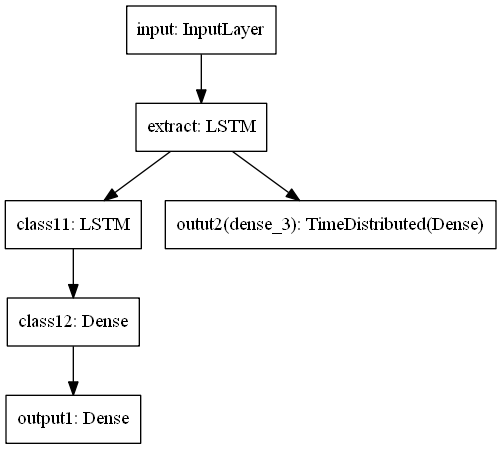

In [3]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.utils import plot_model
from IPython.display import Image 

# 输入层
mnist_input = Input(shape=(784, 1), name='input')

# 特征提取层
extract = LSTM(64, return_sequences=True, name='extract')(mnist_input)

# 输出1： 分类输出
class11 = LSTM(32, name='class11')(extract)
class12 = Dense(32, activation='relu', name='class12')(class11)
output1 = Dense(10, activation='softmax', name='output1')(class12)

# 输出2： 序列输出
output2 = TimeDistributed(Dense(10, activation='softmax'), name='outut2')(extract)

# 组合网络
model = Model(inputs=mnist_input, outputs=[output1, output2])

model.summary()
plot_model(model, to_file='multi_output_model.png')
Image('multi_output_model.png')